In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from wettbewerb import load_references, get_3montages
import mne
from scipy import signal as sig
import preprocess
import features

In [2]:
training_folder = "../shared_data/training_mini"
ids, channels, data, sampling_frequencies, reference_systems, eeg_labels = load_references(training_folder)

100	 Dateien wurden geladen.


In [3]:
import CNN_dataset
import importlib
import CNN_dataset
importlib.reload(CNN_dataset)
CNN_dataset.create_cnn_dataset(ids,channels,data,sampling_frequencies,reference_systems,eeg_labels)


--- Subject 0 --- ID: aaaaaaac_s001_t000

--- Subject 1 --- ID: aaaaaaac_s001_t001

--- Subject 2 --- ID: aaaaaaac_s002_t000

--- Subject 3 --- ID: aaaaaaac_s004_t000

--- Subject 4 --- ID: aaaaaaac_s004_t002

--- Subject 5 --- ID: aaaaaaac_s005_t000

--- Subject 6 --- ID: aaaaaaac_s005_t001

--- Subject 7 --- ID: aaaaaaac_s005_t002

--- Subject 8 --- ID: aaaaaaac_s005_t003

--- Subject 9 --- ID: aaaaaaag_s004_t000

--- Subject 10 --- ID: aaaaaaag_s004_t001

--- Subject 11 --- ID: aaaaaaag_s004_t002

--- Subject 12 --- ID: aaaaaaag_s005_t000

--- Subject 13 --- ID: aaaaaaag_s006_t000

--- Subject 14 --- ID: aaaaaaag_s006_t001

--- Subject 15 --- ID: aaaaaaag_s006_t002

--- Subject 16 --- ID: aaaaaaar_s003_t000

--- Subject 17 --- ID: aaaaaaav_s001_t000

--- Subject 18 --- ID: aaaaaabg_s002_t000

--- Subject 19 --- ID: aaaaaacc_s004_t000

--- Subject 20 --- ID: aaaaaacz_s001_t001

--- Subject 21 --- ID: aaaaaacz_s003_t000

--- Subject 22 --- ID: aaaaaacz_s006_t000_1

--- Subject 23 ---

In [ ]:
import torch
dataset = torch.load("cnn_dataset.pt")
print(len(dataset)  )      # Gibt dir Form: (Anzahl Knoten, Anzahl Features)
x, y = dataset[0]
print("Input Tensor (x):", x.shape)
print("Label (y):", y.item())

/home/jupyter-wki_team_3/wki-sose25/ipykernel_2053726/2409262706.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(dataset_path)


Dataset geladen
Label distribution: Counter({0: 58870, 1: 57})
postiv 57, negative 57
Epoch 01 | Loss: 0.7838 | Test Acc: 0.3478
Epoch 02 | Loss: 0.7541 | Test Acc: 0.7391
Epoch 03 | Loss: 0.7667 | Test Acc: 0.7391
Epoch 04 | Loss: 0.7034 | Test Acc: 0.7826
Epoch 05 | Loss: 0.7103 | Test Acc: 0.6957
Epoch 06 | Loss: 0.7319 | Test Acc: 0.6957
Epoch 07 | Loss: 0.6889 | Test Acc: 0.6522
Epoch 08 | Loss: 0.6895 | Test Acc: 0.7391
Epoch 09 | Loss: 0.7150 | Test Acc: 0.7391
Epoch 10 | Loss: 0.6142 | Test Acc: 0.7391
Epoch 11 | Loss: 0.6847 | Test Acc: 0.7391
Epoch 12 | Loss: 0.7012 | Test Acc: 0.6957
Epoch 13 | Loss: 0.6529 | Test Acc: 0.6957
Epoch 14 | Loss: 0.6856 | Test Acc: 0.6957
Epoch 15 | Loss: 0.6925 | Test Acc: 0.7391
Epoch 16 | Loss: 0.6931 | Test Acc: 0.7391
Epoch 17 | Loss: 0.6314 | Test Acc: 0.7826
Epoch 18 | Loss: 0.6999 | Test Acc: 0.7826
Epoch 19 | Loss: 0.6358 | Test Acc: 0.7826
Epoch 20 | Loss: 0.6275 | Test Acc: 0.7826
Epoch 21 | Loss: 0.6729 | Test Acc: 0.8261
Epoch 22 | 

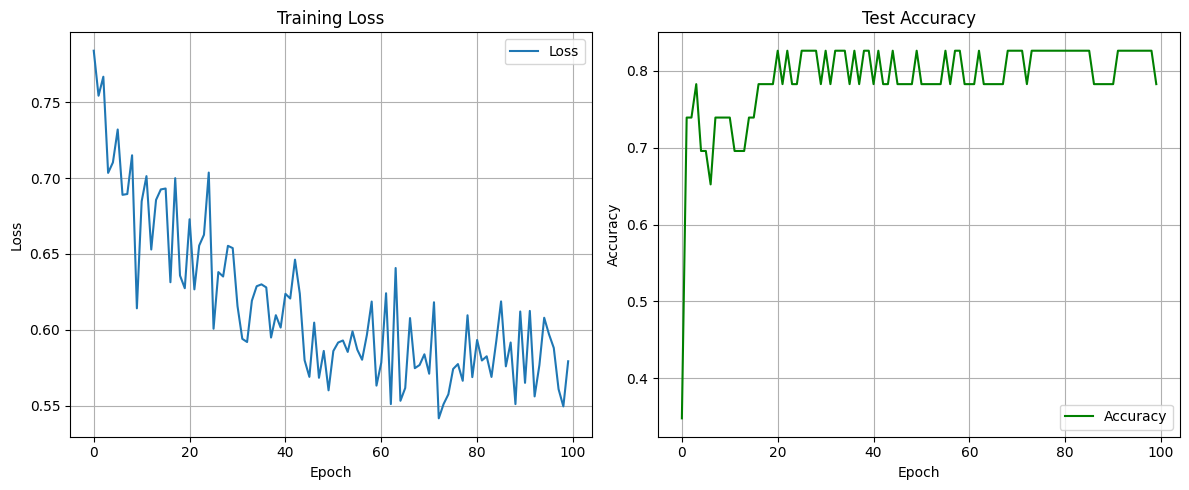

In [3]:
import importlib
import random
import torch
import os
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
#from torch_geometric.data import DataLoader
from collections import Counter
dataset_path = "cnn_dataset.pt"
if not os.path.exists(dataset_path):
    raise FileNotFoundError("Run GNN_dataset.py, um Dataset zu erstellen")
    
dataset = torch.load(dataset_path)
print("Dataset geladen")
labels = [int(tens[1].item()) for tens in dataset]
print("Label distribution:", Counter(labels))

# durch Fensterung kommt es zu viel mehr negativen Samples
positive = [g for g in dataset if g[1].item() == 1]
negative = [g for g in dataset if g[1].item() == 0]

# Gleich viele negative wie positive behalten
negative = random.sample(negative, len(positive))
print(f"postiv {len(positive)}, negative {len(negative)}")
balanced_data = positive + negative
random.shuffle(balanced_data)

# Train Test split the Data 
train_size = int(0.8 * len(balanced_data))
test_size = len(balanced_data) - train_size
torch.manual_seed(42)
train_dataset, test_dataset = random_split(balanced_data, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size =32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size =32, shuffle = False)


import CNN_model

importlib.reload(CNN_model)
model = CNN_model.CNN_EEG(in_channels=1, n_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 100
losses = []
accuracies = []
for epoch in range(1, num_epochs +1):
    loss = CNN_model.train_model(model, train_loader, optimizer, loss_fn)
    acc, _, _ = CNN_model.evaluate_model(model, test_loader)
    losses.append(loss)
    accuracies.append(acc)
    print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | Test Acc: {acc:.4f}")

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
dataset = torch.load("dataset.pt")
X = []
y = []
for graph in dataset:
    X.append(graph.x.mean(dim=0).numpy())
    y.append(int(graph.y.item()))

clf = RandomForestClassifier()
clf.fit(X, y)
print(classification_report(y, clf.predict(X)))

In [25]:
training_folder = "../shared_data/training_mini"
ids, channels, data, sampling_frequencies, reference_systems, eeg_labels = load_references(training_folder)

100	 Dateien wurden geladen.


In [26]:
import GNN_dataset
import importlib

importlib.reload(GNN_dataset)
GNN_dataset.create_graphs(ids,channels,data,sampling_frequencies,reference_systems,eeg_labels)

create_graphs() was called
label_list type: <class 'list'>
label_list[0]: (1, 36.8868, 237.2101)

--- Graph 0 ---
ID: aaaaaaac_s001_t000
Label tuple: (1, 36.8868, 237.2101)
Assigned label: 1 (1)

--- Graph 1 ---
ID: aaaaaaac_s001_t001
Label tuple: (1, 12.0764, 200.3233)
Assigned label: 1 (1)

--- Graph 2 ---
ID: aaaaaaac_s002_t000
Label tuple: (1, 16.0173, 218.0379)
Assigned label: 1 (1)

--- Graph 3 ---
ID: aaaaaaac_s004_t000
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)

--- Graph 4 ---
ID: aaaaaaac_s004_t002
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)

--- Graph 5 ---
ID: aaaaaaac_s005_t000
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)

--- Graph 6 ---
ID: aaaaaaac_s005_t001
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)

--- Graph 7 ---
ID: aaaaaaac_s005_t002
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)

--- Graph 8 ---
ID: aaaaaaac_s005_t003
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)

--- Graph 9 ---
ID: aaaaaaag_s004_t000
Label tuple: (0, 0.0, 0.0)
Assigned

In [2]:
import importlib
import random
import torch
from torch.utils.data import random_split
from torch_geometric.data import DataLoader
from collections import Counter
import GNN_model
dataset_path = "dataset.pt"
if not os.path.exists(dataset_path):
    raise FileNotFoundError("Run GNN_dataset.py, um Dataset zu erstellen")
    
dataset = torch.load(dataset_path)
print("Dataset geladen")
labels = [int(graph.y.item()) for graph in dataset]
print("Label distribution:", Counter(labels))

# durch Fensterung kommt es zu viel mehr negativen Samples
positive = [g for g in dataset if g.y.item() == 1]
negative = [g for g in dataset if g.y.item() == 0]

# Gleich viele negative wie positive behalten
negative = random.sample(negative, len(positive*100))
print(f"postiv {len(positive)}, negative {len(negative)}")
balanced_data = positive + negative
random.shuffle(balanced_data)

# Train Test split the Data 
train_size = int(0.8 * len(balanced_data))
test_size = len(balanced_data) - train_size
torch.manual_seed(42)
train_dataset, test_dataset = random_split(balanced_data, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size =32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size =32, shuffle = False)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN_model.GCN(dataset[0].x.size(1),32).to(device)  # oder dein korrekter Modellname
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()  
num_epochs = 100
losses = []
accuracies = []
for epoch in range(1, num_epochs +1):
    loss = GNN_model.train_model(train_loader)
    acc = GNN_model.evaluate_model(test_loader)
    losses.append(loss)
    accuracies.append(acc)
    print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | Test Acc: {acc:.4f}")

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

/home/jupyter-wki_team_3/.conda/envs/wki-sose25/lib/python3.8/site-packages/torch/__config__.py:10: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._show_config()
/home/jupyter-wki_team_3/wki-sose25/ipykernel_2053598/2921424418.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the 

Dataset geladen
Label distribution: Counter({0: 58870, 1: 57})
postiv 57, negative 5700


/home/jupyter-wki_team_3/.conda/envs/wki-sose25/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 01 | Loss: 1.3799 | Test Acc: 0.0095
Epoch 02 | Loss: 1.3793 | Test Acc: 0.0095
Epoch 03 | Loss: 1.3807 | Test Acc: 0.0095
Epoch 04 | Loss: 1.3793 | Test Acc: 0.0095
Epoch 05 | Loss: 1.3792 | Test Acc: 0.0095
Epoch 06 | Loss: 1.3790 | Test Acc: 0.0095
Epoch 07 | Loss: 1.3789 | Test Acc: 0.0095
Epoch 08 | Loss: 1.3799 | Test Acc: 0.0095
Epoch 09 | Loss: 1.3797 | Test Acc: 0.0095
Epoch 10 | Loss: 1.3808 | Test Acc: 0.0095
Epoch 11 | Loss: 1.3795 | Test Acc: 0.0095
Epoch 12 | Loss: 1.3821 | Test Acc: 0.0095
Epoch 13 | Loss: 1.3789 | Test Acc: 0.0095
Epoch 14 | Loss: 1.3806 | Test Acc: 0.0095
Epoch 15 | Loss: 1.3790 | Test Acc: 0.0095
Epoch 16 | Loss: 1.3787 | Test Acc: 0.0095
Epoch 17 | Loss: 1.3792 | Test Acc: 0.0095
Epoch 18 | Loss: 1.3784 | Test Acc: 0.0095
Epoch 19 | Loss: 1.3787 | Test Acc: 0.0095
Epoch 20 | Loss: 1.3786 | Test Acc: 0.0095
Epoch 21 | Loss: 1.3783 | Test Acc: 0.0095
Epoch 22 | Loss: 1.3798 | Test Acc: 0.0095
Epoch 23 | Loss: 1.3783 | Test Acc: 0.0095
Epoch 24 | 

KeyboardInterrupt: 

In [ ]:
import GNN_model
num_epochs = 100
losses = []
accuracies = []
for epoch in range(1, num_epochs +1):
    loss = GNN_model.train_model(train_loader)
    acc = GNN_model.evaluate_model(test_loader)
    losses.append(loss)
    accuracies.append(acc)
    print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | Test Acc: {acc:.4f}")

In [ ]:
dataset = torch.load("dataset.pt")
data = dataset[0]
print(data.x)              # Gibt die gesamte Feature-Matrix aus
print(data.x.shape)        # Gibt dir Form: (Anzahl Knoten, Anzahl Features)
print(data.x[0]) 
